In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


print("Dataset loaded successfully!")
print(f"Number of training reviews: {len(train_data)}")
print(f"Number of testing reviews: {len(test_data)}")

2025-09-23 08:07:16.430313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758614836.773962      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758614836.863660      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded successfully!
Number of training reviews: 25000
Number of testing reviews: 25000


In [2]:
word_index = imdb.get_word_index()

reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"    
reverse_word_index[1] = "<START>"  
reverse_word_index[2] = "<UNK>"    
reverse_word_index[3] = "<UNUSED>" 


decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[0]])

print("--- First Review (Encoded as numbers) ---")
print(train_data[0])
print("\n--- Same Review (Decoded back to text) ---")
print(decoded_review)
print(f"\n--- Label for this review ---")
print(f"{train_labels[0]} (1 = Positive, 0 = Negative)")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- First Review (Encoded as numbers) ---
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 250

padded_train_data = pad_sequences(train_data, maxlen=maxlen)
padded_test_data = pad_sequences(test_data, maxlen=maxlen)

print("Length of the first review before padding:", len(train_data[0]))
print("Length of the first review after padding:", len(padded_train_data[0]))

Length of the first review before padding: 218
Length of the first review after padding: 250


In [12]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),  # ADDED: Dropout layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # ADDED: Dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the new model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

print("\nTraining complete")

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5223 - loss: 0.6926 - val_accuracy: 0.6785 - val_loss: 0.6898
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5766 - loss: 0.6886 - val_accuracy: 0.5790 - val_loss: 0.6834
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6259 - loss: 0.6794 - val_accuracy: 0.6992 - val_loss: 0.6666
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6963 - loss: 0.6594 - val_accuracy: 0.7338 - val_loss: 0.6393
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7170 - loss: 0.6305 - val_accuracy: 0.7585 - val_loss: 0.6024
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7617 - loss: 0.5893 - val_accuracy: 0.7970 - val_loss: 0.5569
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7816 - loss: 0.5455 - val_accuracy: 0.8179 - val_loss: 0.5094
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8169 - loss: 0.4984 - val_accuracy: 0.8095 - v

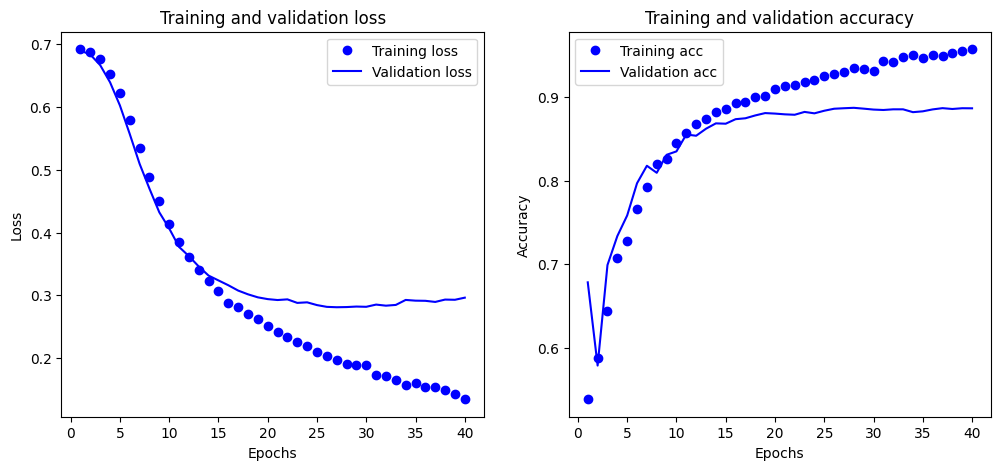

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
results = model.evaluate(padded_test_data, test_labels, verbose=2)

print("\nFinal Test Results (with Dropout):")
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")

782/782 - 1s - 2ms/step - accuracy: 0.8779 - loss: 0.3122

Final Test Results (with Dropout):
Loss: 0.3122023344039917
Accuracy: 0.8778799772262573
